# Boston Housing Data

See UCI Data page: https://archive.ics.uci.edu/ml/datasets/Housing


Data Columns:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

Let's explore the data a bit, make some interactive plots and build a classifier for the data.
 
 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show
output_notebook() # Tell Bokeh to output in an ipython notebook (other options later)

from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model

from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

import ipywidgets
from ipywidgets import interact

Loading BokehJS ...

In [2]:
boston_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv("../data/boston/housing.data", sep='\s+', names=boston_cols)

In [4]:
pd.read_csv?

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


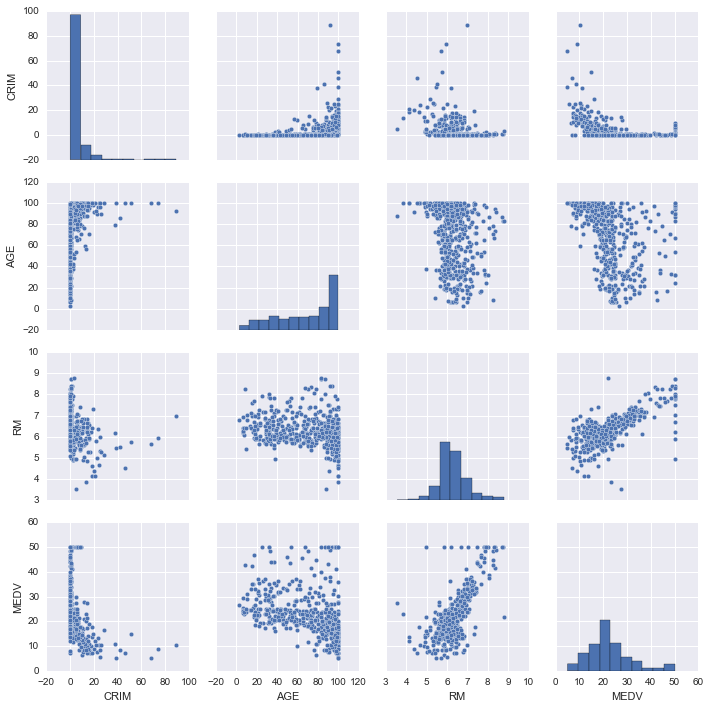

In [7]:
sns.pairplot(df[["CRIM", "AGE", "RM", "MEDV"]])

In [8]:
p1 = figure(title="Boston Housing")
p1.scatter(x='MEDV', y='AGE', source=ColumnDataSource(df), color="green")
p1.xaxis.axis_label = "MEDV"
p1.yaxis.axis_label = "AGE"
show(p1)

In [9]:
df['CRIM'].quantile(.50)

0.25651000000000002

In [10]:
p2 = figure()
df['color'] = 'green'
top_third = df['CRIM'] < df['CRIM'].quantile(.33)
df.loc[top_third, 'color'] = "blue"
bottom_third = df['CRIM'] > df['CRIM'].quantile(.66)
df.loc[bottom_third, 'color'] = "red"
p2.scatter(x='MEDV', y='AGE', source=ColumnDataSource(df), color="color")
p2.xaxis.axis_label = "MEDV"
p2.yaxis.axis_label = "AGE"
show(p2)

In [11]:

df['color'] = 'green'
top_third = df['CRIM'] < df['CRIM'].quantile(.33)
df.loc[top_third, 'color'] = "blue"
bottom_third = df['CRIM'] > df['CRIM'].quantile(.66)
df.loc[bottom_third, 'color'] = "red"

source = ColumnDataSource(df)
hover = HoverTool(tooltips=[(col, "@"+col) for col in df.columns if col in ['AGE', 'MEDV', 'CRIM', 'RM']])

p2 = figure(tools=[hover])
p2.scatter(x='MEDV', y='AGE', source=source, color="color")
p2.xaxis.axis_label = "MEDV"
p2.yaxis.axis_label = "AGE"
show(p2)

## Adding Interactivity to Boston Data

In [13]:
def get_boston_df():
    df = pd.read_csv("../data/boston/housing.data", sep='\s+', names=boston_cols)
    df['color'] = 'green'
    top_third = df['CRIM'] < df['CRIM'].quantile(.33)
    df.loc[top_third, 'color'] = "blue"
    bottom_third = df['CRIM'] > df['CRIM'].quantile(.66)
    df.loc[bottom_third, 'color'] = "red"
    df['alpha'] = 1
    return df

source = ColumnDataSource(get_boston_df())
hover = HoverTool(tooltips=[(col, "@"+col) for col in source.data.keys() if col in ['AGE', 'MEDV', 'CRIM', 'RM']])

p2 = figure(tools=[hover])
p2.scatter(x='MEDV', y='RM', source=source, color="color", alpha='alpha')
p2.xaxis.axis_label = "MEDV"
p2.yaxis.axis_label = "RM"

In [14]:
def update(age_range):
    df = get_boston_df()
    df = df[df['AGE'].between(*age_range)]
    #ages = np.array(source.data['AGE'])
    #source.data['alpha'] = np.where(np.logical_and(ages > age_range[0], ages < age_range[1]), 1, 0)
    for key in list(df.columns):
        source.data[key] = list(df[key])
    source.push_notebook()

In [15]:
show(p2)

In [16]:
age_widget = ipywidgets.widgets.IntRangeSlider(    
    value=(25, 75),
    min=5,
    max=100,
    step=5,
    description='Age:',)
interact(update, age_range=age_widget)

/Users/cdoig/anaconda/envs/py101/lib/python3.4/site-packages/ipykernel/__main__.py:8: BokehDeprecationWarning: bokeh.models.sources.push_notebook was deprecated in Bokeh 0.11.0; please use bokeh.io.push_notebook instead


<function __main__.update>

<hr/>

## Predicting Housing value with SciKit Learn

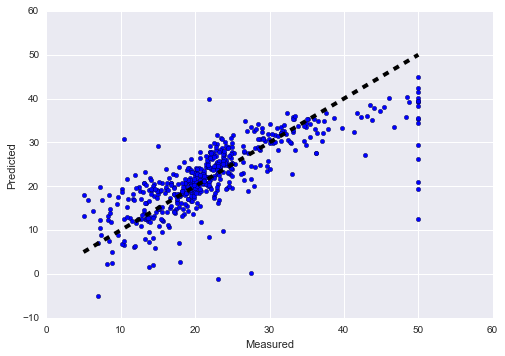

In [17]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

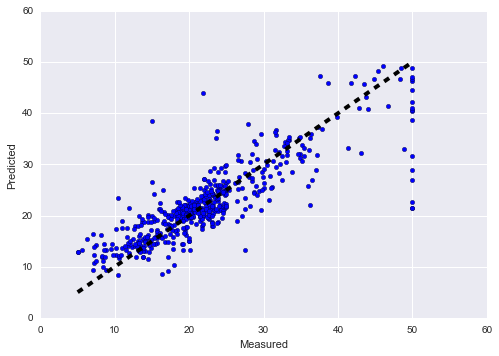

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
predicted = cross_val_predict(rf_reg, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
lr.fit(boston.data, y)
lr.score(boston.data, y)

0.74060774286494269

In [20]:
rf_reg.fit(boston.data, y)
rf_reg.score(boston.data, y)

0.97682376502031831